In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
from swmm_api import read_out_file
import os
from matplotlib.gridspec import GridSpec

from matplotlib import rcParams

config = {
            "font.family": 'serif',
            "font.size": 12,# 相当于小四大小
            "mathtext.fontset": 'stix',#matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
            "font.serif": ['Arial'],#['Times New Roman'],#宋体
            'axes.unicode_minus': False # 处理负号，即-号
         }
rcParams.update(config)

c:\Users\chong\anaconda3\envs\tensorflow-cpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
realrainid = [10,20,30,40,50,60]
exrainid = [1,2,3,4]
rainid = realrainid + exrainid
print(rainid,exrainid)

[10, 20, 30, 40, 50, 60, 1, 2, 3, 4] [1, 2, 3, 4]


# Load results files

In [3]:
results_PPO = {}
results_PPO_preK1, results_PPO_KGK1 = {}, {}
results_PPO_preK2, results_PPO_KGK2 = {}, {},
results_PPO_preK3, results_PPO_KGK3 = {}, {},
results_PPO_preK2, results_PPO_KGK2 = {}, {},
results_PPO_preK123, results_PPO_KGK123 = {}, {},
results_BC, results_DN = {}, {}
results_BC2, results_DN2 = {}, {}

for i in range(len(realrainid)):
    results_BC['rain'+str(rainid[i])] = np.load('./step0-knowledge/BC_results/bc_results_rain'+str(rainid[i])+'.npy',allow_pickle=True).tolist()
    results_DN['rain'+str(rainid[i])] = np.load('./step0-knowledge/DN_results/dn_results_rain'+str(rainid[i])+'.npy',allow_pickle=True).tolist()
    results_DN2['rain'+str(rainid[i])] = np.load('./step0-knowledge/DNv2_results/dnv2_results_rain'+str(rainid[i])+'.npy',allow_pickle=True).tolist()
    results_BC2['rain'+str(rainid[i])] = np.load('./step0-knowledge/BC2_results/bc2_results_rain'+str(rainid[i])+'.npy',allow_pickle=True).tolist()
    
    results_PPO['rain'+str(rainid[i])] = np.load('./step3-LFS/results/ppo_results_rain'+str(rainid[i])+'.npy',allow_pickle=True).tolist()
    results_PPO_preK1['rain'+str(rainid[i])] = np.load('./step1-pretrainK1/results/ppo_results_rain'+str(rainid[i])+'.npy',allow_pickle=True).tolist()
    results_PPO_KGK1['rain'+str(rainid[i])] = np.load('./step2-finetuneK1/results/ppo_results_rain'+str(rainid[i])+'.npy',allow_pickle=True).tolist()
    results_PPO_preK2['rain'+str(rainid[i])] = np.load('./step1-pretrainK3/results/ppo_results_rain'+str(rainid[i])+'.npy',allow_pickle=True).tolist()
    results_PPO_KGK2['rain'+str(rainid[i])] = np.load('./step2-finetuneK3/results/ppo_results_rain'+str(rainid[i])+'.npy',allow_pickle=True).tolist()
    results_PPO_preK3['rain'+str(rainid[i])] = np.load('./step1-pretrainK3/results/ppo_results_rain'+str(rainid[i])+'.npy',allow_pickle=True).tolist()
    results_PPO_KGK3['rain'+str(rainid[i])] = np.load('./step2-finetuneK3/results/ppo_results_rain'+str(rainid[i])+'.npy',allow_pickle=True).tolist()
    results_PPO_preK123['rain'+str(rainid[i])] = np.load('./step1-pretrainK123/results/ppo_results_rain'+str(rainid[i])+'.npy',allow_pickle=True).tolist()
    results_PPO_KGK123['rain'+str(rainid[i])] = np.load('./step2-finetuneK123/results/ppo_results_rain'+str(rainid[i])+'.npy',allow_pickle=True).tolist()

for i in range(len(exrainid)):
    results_BC['rain'+str(exrainid[i])] = np.load('./step0-knowledge/BC_results/real_bc_results_rain'+str(exrainid[i]-1)+'.npy',allow_pickle=True).tolist()
    results_DN['rain'+str(exrainid[i])] = np.load('./step0-knowledge/DN_results/real_dn_results_rain'+str(exrainid[i]-1)+'.npy',allow_pickle=True).tolist()
    results_DN2['rain'+str(exrainid[i])] = np.load('./step0-knowledge/DNv2_results/real_dnv2_results_rain'+str(exrainid[i]-1)+'.npy',allow_pickle=True).tolist()
    results_BC2['rain'+str(exrainid[i])] = np.load('./step0-knowledge/BC2_results/real_bc2_results_rain'+str(exrainid[i]-1)+'.npy',allow_pickle=True).tolist()
    
    results_PPO['rain'+str(exrainid[i])] = np.load('./step3-LFS/results/real_ppo_results_rain'+str(exrainid[i]-1)+'.npy',allow_pickle=True).tolist()
    results_PPO_preK1['rain'+str(exrainid[i])] = np.load('./step1-pretrainK1/results/real_ppo_results_rain'+str(exrainid[i]-1)+'.npy',allow_pickle=True).tolist()
    results_PPO_KGK1['rain'+str(exrainid[i])] = np.load('./step2-finetuneK1/results/real_ppo_results_rain'+str(exrainid[i]-1)+'.npy',allow_pickle=True).tolist()
    results_PPO_preK2['rain'+str(exrainid[i])] = np.load('./step1-pretrainK3/results/real_ppo_results_rain'+str(exrainid[i]-1)+'.npy',allow_pickle=True).tolist()
    results_PPO_KGK2['rain'+str(exrainid[i])] = np.load('./step2-finetuneK3/results/real_ppo_results_rain'+str(exrainid[i]-1)+'.npy',allow_pickle=True).tolist()
    results_PPO_preK3['rain'+str(exrainid[i])] = np.load('./step1-pretrainK3/results/real_ppo_results_rain'+str(exrainid[i]-1)+'.npy',allow_pickle=True).tolist()
    results_PPO_KGK3['rain'+str(exrainid[i])] = np.load('./step2-finetuneK3/results/real_ppo_results_rain'+str(exrainid[i]-1)+'.npy',allow_pickle=True).tolist()
    results_PPO_preK123['rain'+str(exrainid[i])] = np.load('./step1-pretrainK123/results/real_ppo_results_rain'+str(exrainid[i]-1)+'.npy',allow_pickle=True).tolist()
    results_PPO_KGK123['rain'+str(exrainid[i])] = np.load('./step2-finetuneK123/results/real_ppo_results_rain'+str(exrainid[i]-1)+'.npy',allow_pickle=True).tolist()


# Table 5, flooding+CSO results

In [4]:
table4 = {'BC':[],
          'DN':[],
          'DN2':[],
          'BC2':[],
          'PPO':[],
          'PPO_preK1':[],
          'PPO_KGK1':[],
          'PPO_preK2':[],
          'PPO_KGK2':[],
          'PPO_preK3':[],
          'PPO_KGK3':[],
          'PPO_preK123':[],
          'PPO_KGK123':[],
          }

for i in rainid:
    # F+C
    table4['BC'].append(results_BC['rain'+str(i)]['flooding'][-1])
    table4['BC'].append(results_BC['rain'+str(i)]['CSO'][-1])
    table4['BC'].append(results_BC['rain'+str(i)]['flooding'][-1]+results_BC['rain'+str(i)]['CSO'][-1])

    table4['DN'].append(results_DN['rain'+str(i)]['flooding'][-1])
    table4['DN'].append(results_DN['rain'+str(i)]['CSO'][-1])
    table4['DN'].append(results_DN['rain'+str(i)]['flooding'][-1]+results_DN['rain'+str(i)]['CSO'][-1])

    table4['DN2'].append(results_DN2['rain'+str(i)]['flooding'][-1])
    table4['DN2'].append(results_DN2['rain'+str(i)]['CSO'][-1])
    table4['DN2'].append(results_DN2['rain'+str(i)]['flooding'][-1]+results_DN2['rain'+str(i)]['CSO'][-1])

    table4['BC2'].append(results_BC2['rain'+str(i)]['flooding'][-1])
    table4['BC2'].append(results_BC2['rain'+str(i)]['CSO'][-1])
    table4['BC2'].append(results_BC2['rain'+str(i)]['flooding'][-1]+results_BC2['rain'+str(i)]['CSO'][-1])

    table4['PPO'].append(results_PPO['rain'+str(i)]['flooding'][-1])
    table4['PPO'].append(results_PPO['rain'+str(i)]['CSO'][-1])
    table4['PPO'].append(results_PPO['rain'+str(i)]['CSO'][-1]+results_PPO['rain'+str(i)]['flooding'][-1])

    table4['PPO_preK1'].append(results_PPO_preK1['rain'+str(i)]['flooding'][-1])
    table4['PPO_preK1'].append(results_PPO_preK1['rain'+str(i)]['CSO'][-1])
    table4['PPO_preK1'].append(results_PPO_preK1['rain'+str(i)]['CSO'][-1]+results_PPO_preK1['rain'+str(i)]['flooding'][-1])

    table4['PPO_preK2'].append(results_PPO_preK2['rain'+str(i)]['flooding'][-1])
    table4['PPO_preK2'].append(results_PPO_preK2['rain'+str(i)]['CSO'][-1])
    table4['PPO_preK2'].append(results_PPO_preK2['rain'+str(i)]['CSO'][-1]+results_PPO_preK2['rain'+str(i)]['flooding'][-1])

    table4['PPO_preK3'].append(results_PPO_preK3['rain'+str(i)]['flooding'][-1])
    table4['PPO_preK3'].append(results_PPO_preK3['rain'+str(i)]['CSO'][-1])
    table4['PPO_preK3'].append(results_PPO_preK3['rain'+str(i)]['CSO'][-1]+results_PPO_preK3['rain'+str(i)]['flooding'][-1])

    table4['PPO_preK123'].append(results_PPO_preK123['rain'+str(i)]['flooding'][-1])
    table4['PPO_preK123'].append(results_PPO_preK123['rain'+str(i)]['CSO'][-1])
    table4['PPO_preK123'].append(results_PPO_preK123['rain'+str(i)]['CSO'][-1]+results_PPO_preK123['rain'+str(i)]['flooding'][-1])

    table4['PPO_KGK1'].append(results_PPO_KGK1['rain'+str(i)]['flooding'][-1])
    table4['PPO_KGK1'].append(results_PPO_KGK1['rain'+str(i)]['CSO'][-1])
    table4['PPO_KGK1'].append(results_PPO_KGK1['rain'+str(i)]['CSO'][-1]+results_PPO_KGK1['rain'+str(i)]['flooding'][-1])

    table4['PPO_KGK2'].append(results_PPO_KGK2['rain'+str(i)]['flooding'][-1])
    table4['PPO_KGK2'].append(results_PPO_KGK2['rain'+str(i)]['CSO'][-1])
    table4['PPO_KGK2'].append(results_PPO_KGK2['rain'+str(i)]['CSO'][-1]+results_PPO_KGK2['rain'+str(i)]['flooding'][-1])

    table4['PPO_KGK3'].append(results_PPO_KGK3['rain'+str(i)]['flooding'][-1])
    table4['PPO_KGK3'].append(results_PPO_KGK3['rain'+str(i)]['CSO'][-1])
    table4['PPO_KGK3'].append(results_PPO_KGK3['rain'+str(i)]['CSO'][-1]+results_PPO_KGK3['rain'+str(i)]['flooding'][-1])

    table4['PPO_KGK123'].append(results_PPO_KGK123['rain'+str(i)]['flooding'][-1])
    table4['PPO_KGK123'].append(results_PPO_KGK123['rain'+str(i)]['CSO'][-1])
    table4['PPO_KGK123'].append(results_PPO_KGK123['rain'+str(i)]['CSO'][-1]+results_PPO_KGK123['rain'+str(i)]['flooding'][-1])

pd.DataFrame(table4).to_csv('table_FC_PPO.csv')

# Bar fig

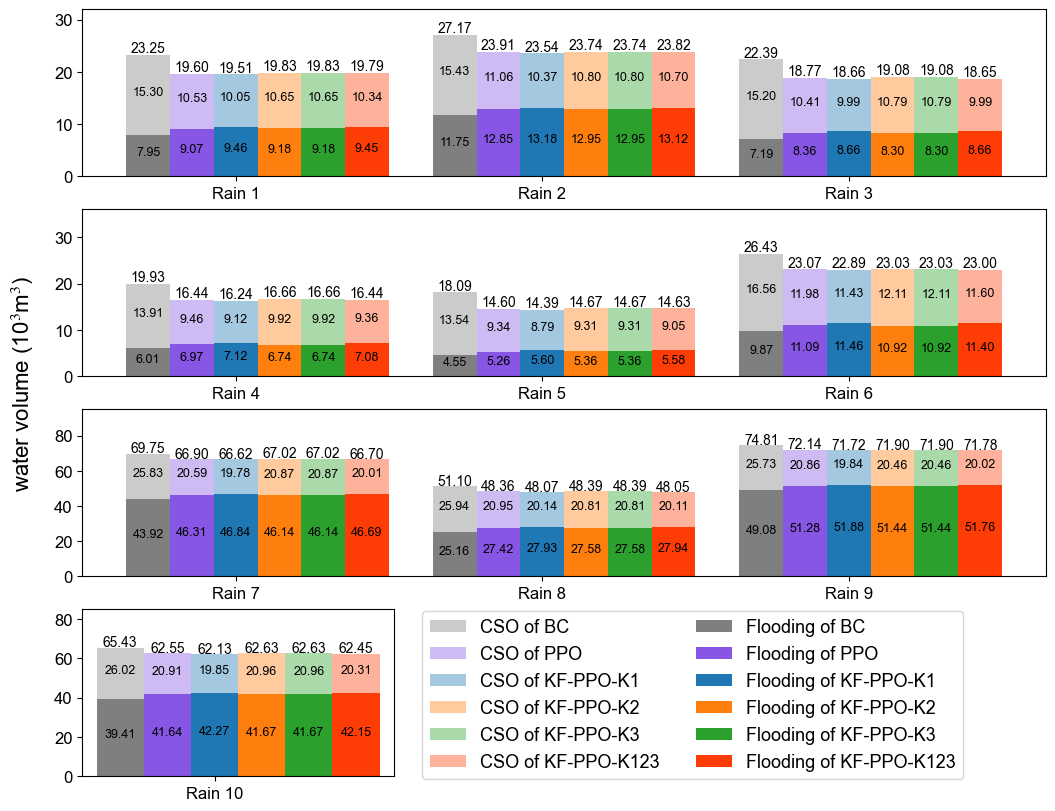

In [5]:
# KF/KG
fig = plt.figure(dpi=100,
                 constrained_layout=True,#类似于tight_layout，使得各子图之间的距离自动调整【类似excel中行宽根据内容自适应】
                 figsize=(10,8)
                )
gs = GridSpec(4, 3, figure=fig)#GridSpec将fiure分为3行3列，每行三个axes，gs为一个matplotlib.gridspec.GridSpec对象，可灵活的切片figure
i = 0
line, lineend, linehigh = 0, [2,5,8,9], [32,36,95,85]
while line<4:
    if line == 0:
        i=0
    else:
        i += 1
    xcfk = 0
    ycf = [(results_DN['rain'+str(rainid[i])]['flooding'][-1]+results_DN['rain'+str(rainid[i])]['CSO'][-1])/1000,
        (results_PPO['rain'+str(rainid[i])]['CSO'][-1]+results_PPO['rain'+str(rainid[i])]['flooding'][-1])/1000,
        (results_PPO_KGK1['rain'+str(rainid[i])]['CSO'][-1]+results_PPO_KGK1['rain'+str(rainid[i])]['flooding'][-1])/1000,
        (results_PPO_KGK2['rain'+str(rainid[i])]['CSO'][-1]+results_PPO_KGK2['rain'+str(rainid[i])]['flooding'][-1])/1000,
        (results_PPO_KGK3['rain'+str(rainid[i])]['CSO'][-1]+results_PPO_KGK3['rain'+str(rainid[i])]['flooding'][-1])/1000,
        (results_PPO_KGK123['rain'+str(rainid[i])]['CSO'][-1]+results_PPO_KGK123['rain'+str(rainid[i])]['flooding'][-1])/1000]
    yf = [(results_DN['rain'+str(rainid[i])]['flooding'][-1])/1000,
        (results_PPO['rain'+str(rainid[i])]['flooding'][-1])/1000,
        (results_PPO_KGK1['rain'+str(rainid[i])]['flooding'][-1])/1000,
        (results_PPO_KGK2['rain'+str(rainid[i])]['flooding'][-1])/1000,
        (results_PPO_KGK3['rain'+str(rainid[i])]['flooding'][-1])/1000,
        (results_PPO_KGK123['rain'+str(rainid[i])]['flooding'][-1])/1000]
    temxcf = [1,2,3,4,5,6]
    xcf = temxcf.copy()
    temxlabf = [3]
    xlabf = temxlabf.copy()
    ccf = ['#7f7f7f','#8756e4','#1f77b4','#ff7f0e','#2ca02c','#fd3c06']
    xlab = ['Rain '+str(i+1)]
    xlabtitle1 = ['CSO of BC','CSO of PPO','CSO of KF-PPO-K1','CSO of KF-PPO-K2','CSO of KF-PPO-K3','CSO of KF-PPO-K123']
    xlabtitle2 = ['Flooding of BC','Flooding of PPO','Flooding of KF-PPO-K1','Flooding of KF-PPO-K2','Flooding of KF-PPO-K3','Flooding of KF-PPO-K123']

    while i<lineend[line]:
        i += 1
        xcfk += 1
        ycf += [(results_DN['rain'+str(rainid[i])]['flooding'][-1]+results_DN['rain'+str(rainid[i])]['CSO'][-1])/1000,
                (results_PPO['rain'+str(rainid[i])]['CSO'][-1]+results_PPO['rain'+str(rainid[i])]['flooding'][-1])/1000,
                (results_PPO_KGK1['rain'+str(rainid[i])]['CSO'][-1]+results_PPO_KGK1['rain'+str(rainid[i])]['flooding'][-1])/1000,
                (results_PPO_KGK2['rain'+str(rainid[i])]['CSO'][-1]+results_PPO_KGK2['rain'+str(rainid[i])]['flooding'][-1])/1000,
                (results_PPO_KGK3['rain'+str(rainid[i])]['CSO'][-1]+results_PPO_KGK3['rain'+str(rainid[i])]['flooding'][-1])/1000,
                (results_PPO_KGK123['rain'+str(rainid[i])]['CSO'][-1]+results_PPO_KGK123['rain'+str(rainid[i])]['flooding'][-1])/1000]
        yf += [(results_DN['rain'+str(rainid[i])]['flooding'][-1])/1000,
                (results_PPO['rain'+str(rainid[i])]['flooding'][-1])/1000,
                (results_PPO_KGK1['rain'+str(rainid[i])]['flooding'][-1])/1000,
                (results_PPO_KGK2['rain'+str(rainid[i])]['flooding'][-1])/1000,
                (results_PPO_KGK3['rain'+str(rainid[i])]['flooding'][-1])/1000,
                (results_PPO_KGK123['rain'+str(rainid[i])]['flooding'][-1])/1000]
        xcf += (np.array(temxcf)+7*xcfk).tolist()
        xlabf += (np.array(temxlabf)+7*xcfk).tolist()
        ccf += ccf
        xlab += ['Rain '+str(i+1)]

    if line == 3:
        ax3 = fig.add_subplot(gs[line, 0])
        ax3.bar(xcf,ycf,color=ccf,width=1,alpha = 0.4,label = xlabtitle1)
        ax3.bar(xcf,yf,color=ccf,width=1,label = xlabtitle2)
        #ax3.set_ylabel('water volume (10'+'$^{3}$'+'m'+'$^{3}$'+')',fontsize=17)
        ax3.set_xticks(xlabf,xlab,fontsize=12)
        ax3.set_ylim(0,linehigh[line])
    else:
        ax3 = fig.add_subplot(gs[line, :])
        ax3.bar(xcf,ycf,color=ccf,width=1,alpha = 0.4)
        ax3.bar(xcf,yf,color=ccf,width=1)
        #ax3.set_ylabel('water volume (10'+'$^{3}$'+'m'+'$^{3}$'+')',fontsize=17)
        ax3.set_xticks(xlabf,xlab,fontsize=12)
        ax3.set_ylim(0,linehigh[line])

    for itt in range(len(xcf)):
        ycf_term = round(ycf[itt],3)
        yf_term = round(yf[itt],3)
        yc_term = round(ycf_term - yf_term,3)
        #print(ycf_term,yf_term,yc_term)
        
        plt.text(x=xcf[itt], y=ycf[itt]+0.5, s='%.2f'%ycf_term,ha='center',fontsize=10)
        plt.text(x=xcf[itt], y=yf[itt]+(ycf[itt]-yf[itt])/2, s='%.2f'%yc_term,ha='center',fontsize=9)
        plt.text(x=xcf[itt], y=yf[itt]/2, s='%.2f'%yf_term,ha='center',fontsize=9)

    line += 1
fig.legend(ncol=2, loc=(0.4,0.04),fontsize=13)
fig.text(x=-0.04, y=0.4, rotation=90, s='water volume (10'+'$^{3}$'+'m'+'$^{3}$'+')',fontsize=16)
plt.savefig('./KGPPO-FCbar.png',dpi=200,bbox_inches='tight')

# Reward t

## Pre DRL

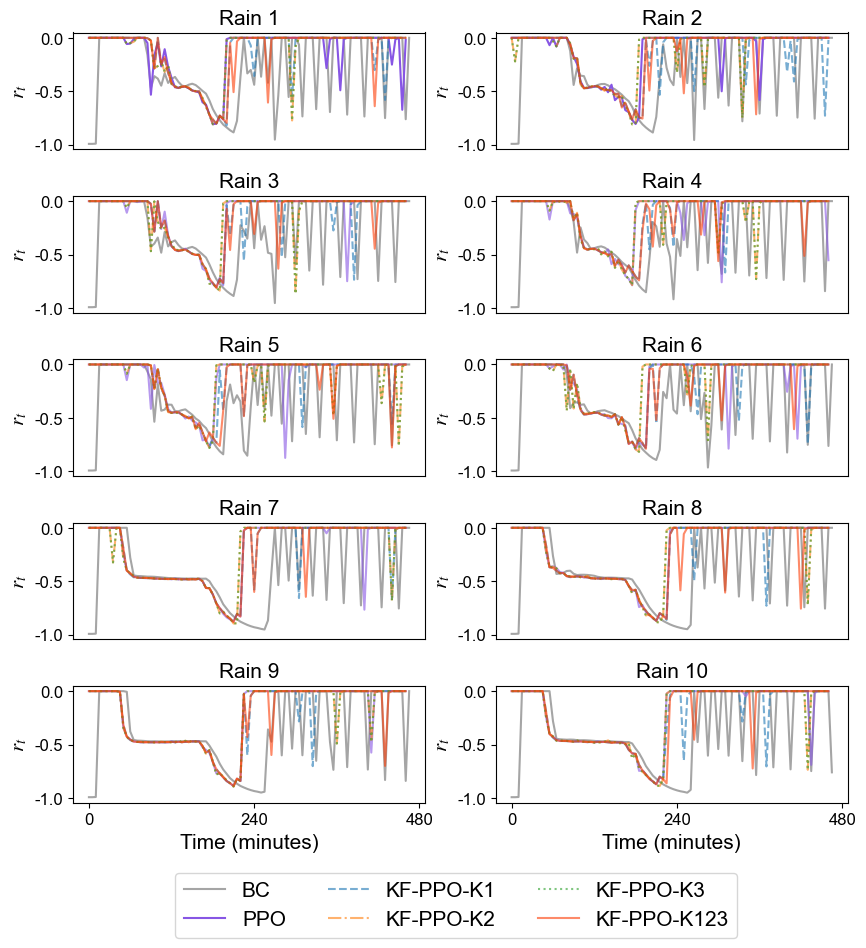

In [12]:
# designing rainfall
# PPO reward_t
fig,ax = plt.subplots(5,2,figsize=(10,10))
ccf = {'BC':'#7f7f7f',
       'PPO':'#8756e4',
       'K1':'#1f77b4',
       'K2':'#ff7f0e',
       'K3':'#2ca02c',
       'K123':'#fd3c06'
       }

#'#7f7f7f','#8756e4','#1f77b4','#ff7f0e','#2ca02c','#fd3c06'
a = 15
for i in range(5):
    if i == 0:
        ax[i,0].set_ylabel('$r_{t}$',fontsize=a)
        ax[i,1].set_ylabel('$r_{t}$',fontsize=a)
        ax[i,0].set_title('Rain '+str(i*2+1),fontsize=a)
        
        ax[i,1].set_title('Rain '+str(i*2+1+1),fontsize=a)
        ax[i,0].set_xticks([])
        ax[i,1].set_xticks([])
        
        ax[i,0].plot(np.array(results_DN['rain'+str(rainid[i*2])]['rewards'][2:]),label='BC',color=ccf['BC'],alpha=0.7)
        ax[i,0].plot(np.array(results_PPO['rain'+str(rainid[i*2])]['rewards'][2:]),label='PPO',color=ccf['PPO'],alpha=1)
        ax[i,0].plot(np.array(results_PPO_KGK1['rain'+str(rainid[i*2])]['rewards'][2:]),linestyle='--',label='KF-PPO-K1',color=ccf['K1'],alpha=0.6)
        ax[i,0].plot(np.array(results_PPO_KGK2['rain'+str(rainid[i*2])]['rewards'][2:]),linestyle='-.',label='KF-PPO-K2',color=ccf['K2'],alpha=0.6)
        ax[i,0].plot(np.array(results_PPO_KGK3['rain'+str(rainid[i*2])]['rewards'][2:]),linestyle=':',label='KF-PPO-K3',color=ccf['K3'],alpha=0.6)
        ax[i,0].plot(np.array(results_PPO_KGK123['rain'+str(rainid[i*2])]['rewards'][2:]),label='KF-PPO-K123',color=ccf['K123'],alpha=0.6)
        
        ax[i,1].plot(np.array(results_DN['rain'+str(rainid[i*2+1])]['rewards'][2:]),color=ccf['BC'],alpha=0.7)
        ax[i,1].plot(np.array(results_PPO['rain'+str(rainid[i*2+1])]['rewards'][2:]),color=ccf['PPO'],alpha=1)
        ax[i,1].plot(np.array(results_PPO_KGK1['rain'+str(rainid[i*2+1])]['rewards'][2:]),linestyle='--',color=ccf['K1'],alpha=0.6)
        ax[i,1].plot(np.array(results_PPO_KGK2['rain'+str(rainid[i*2+1])]['rewards'][2:]),linestyle='-.',color=ccf['K2'],alpha=0.6)
        ax[i,1].plot(np.array(results_PPO_KGK3['rain'+str(rainid[i*2+1])]['rewards'][2:]),linestyle=':',color=ccf['K3'],alpha=0.6)
        ax[i,1].plot(np.array(results_PPO_KGK123['rain'+str(rainid[i*2+1])]['rewards'][2:]),color=ccf['K123'],alpha=0.6)
        
    else:
        ax[i,0].set_ylabel('$r_{t}$',fontsize=a)
        ax[i,1].set_ylabel('$r_{t}$',fontsize=a)
        ax[i,0].set_title('Rain '+str(i*2+1),fontsize=a)
        ax[i,1].set_title('Rain '+str(i*2+1+1),fontsize=a)
        ax[i,0].set_xticks([])
        ax[i,1].set_xticks([])
        
        ax[i,0].plot(np.array(results_DN['rain'+str(rainid[i*2])]['rewards'][2:]),color=ccf['BC'],alpha=0.7)
        ax[i,0].plot(np.array(results_PPO['rain'+str(rainid[i*2])]['rewards'][2:]),color=ccf['PPO'],alpha=0.6)
        ax[i,0].plot(np.array(results_PPO_KGK1['rain'+str(rainid[i*2])]['rewards'][2:]),linestyle='--',color=ccf['K1'],alpha=0.6)
        ax[i,0].plot(np.array(results_PPO_KGK2['rain'+str(rainid[i*2])]['rewards'][2:]),linestyle='-.',color=ccf['K2'],alpha=0.6)
        ax[i,0].plot(np.array(results_PPO_KGK3['rain'+str(rainid[i*2])]['rewards'][2:]),linestyle=':',color=ccf['K3'],alpha=0.6)
        ax[i,0].plot(np.array(results_PPO_KGK123['rain'+str(rainid[i*2])]['rewards'][2:]),color=ccf['K123'],alpha=0.6)
        
        ax[i,1].plot(np.array(results_DN['rain'+str(rainid[i*2+1])]['rewards'][2:]),color=ccf['BC'],alpha=0.7)
        ax[i,1].plot(np.array(results_PPO['rain'+str(rainid[i*2+1])]['rewards'][2:]),color=ccf['PPO'],alpha=0.6)
        ax[i,1].plot(np.array(results_PPO_KGK1['rain'+str(rainid[i*2+1])]['rewards'][2:]),linestyle='--',color=ccf['K1'],alpha=0.6)
        ax[i,1].plot(np.array(results_PPO_KGK2['rain'+str(rainid[i*2+1])]['rewards'][2:]),linestyle='-.',color=ccf['K2'],alpha=0.6)
        ax[i,1].plot(np.array(results_PPO_KGK3['rain'+str(rainid[i*2+1])]['rewards'][2:]),linestyle=':',color=ccf['K3'],alpha=0.6)
        ax[i,1].plot(np.array(results_PPO_KGK123['rain'+str(rainid[i*2+1])]['rewards'][2:]),color=ccf['K123'],alpha=0.6)
        
fig.legend(ncols=3,bbox_to_anchor=(0.8,0.05),fontsize=a)

for i in range(2):
    ax[4,i].set_xlabel('Time (minutes)',fontsize=a)
    ax[4,i].set_xticks([0,96/2,96],['0','240','480'])

fig.subplots_adjust(wspace=0.2,hspace=0.4)
plt.savefig('./figure_PrePPO_rewardt.png',dpi=200,bbox_inches='tight')